In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import average_precision_score
import tensorflow.keras.backend as k

2025-02-04 09:45:06.407183: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 09:45:06.407639: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 09:45:06.409857: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 09:45:06.416124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738673106.426855 3559541 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738673106.43

## Pré - Processamento

### Carregamento dos dados de treino e teste

In [2]:
df = pd.read_csv('data/adult.data',  names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

In [3]:
df1 = pd.read_csv("data/adult.test",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',\
        na_values="?")

In [4]:
data = pd.concat([df, df1], ignore_index= True)

In [5]:
names_cloud = data.columns.tolist()
print(names_cloud)
X = np.array(data[names_cloud])
print(X.shape)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target']
(48842, 15)


In [6]:
y = (data['Target'].map({"<=50K":0,">50K":1})).values
print(pd.value_counts(pd.Series(y)))
data.drop('Target',axis=1, inplace =True,)

0    37155
1    11687
Name: count, dtype: int64


/tmp/ipykernel_3559541/3481380141.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(pd.Series(y)))


### Codificação de Variáveis Categóricas

In [7]:
categorical_features = data.select_dtypes(include=['object']).columns
print(categorical_features)
ohc_category = ['Workclass', 'Education', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
df_ohc = pd.get_dummies(data, columns = ohc_category)
print(df_ohc.shape)
df_ohc.head()

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country'],
      dtype='object')
(48842, 105)


,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,...,Country_Portugal,Country_Puerto-Rico,Country_Scotland,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [8]:
names_x = df_ohc.columns.tolist()
print("Target Variable: Target")
print("Predictors: "+str(names_x))
x = np.array(df_ohc[names_x])
print("Número de amostras de dados : {0:d}".format(x.shape[0]))
print("Número de recursos : {0:d}".format(x.shape[1]))

Target Variable: Target
Predictors: ['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Workclass_Federal-gov', 'Workclass_Local-gov', 'Workclass_Never-worked', 'Workclass_Private', 'Workclass_Self-emp-inc', 'Workclass_Self-emp-not-inc', 'Workclass_State-gov', 'Workclass_Without-pay', 'Education_10th', 'Education_11th', 'Education_12th', 'Education_1st-4th', 'Education_5th-6th', 'Education_7th-8th', 'Education_9th', 'Education_Assoc-acdm', 'Education_Assoc-voc', 'Education_Bachelors', 'Education_Doctorate', 'Education_HS-grad', 'Education_Masters', 'Education_Preschool', 'Education_Prof-school', 'Education_Some-college', 'Martial Status_Divorced', 'Martial Status_Married-AF-spouse', 'Martial Status_Married-civ-spouse', 'Martial Status_Married-spouse-absent', 'Martial Status_Never-married', 'Martial Status_Separated', 'Martial Status_Widowed', 'Occupation_Adm-clerical', 'Occupation_Armed-Forces', 'Occupation_Craft-repair', 'Occupation_Exec-managerial', 

## Modelo Alvo

In [9]:
x = x.astype('float32')
scaler = MinMaxScaler()

x = scaler.fit_transform(x)


data_size = 10000
ns = 5 #número de modelos sombras

seed = 7
np.random.seed(seed)
sh = np.arange(x.shape[0])
np.random.shuffle(sh)
target_rep = np.zeros((1,x.shape[0]))
target_rep[0,:] = sh
print(sh)

[23509 38928 23796 ...   919 38467 10742]


In [10]:
k.clear_session()

xtr_target = x[sh[:data_size]]
ytr_target = y[sh[:data_size]]
xts_target = x[sh[data_size:data_size*2]]
yts_target = y[sh[data_size:2*data_size]]

shadow_rep = np.zeros((5,x.shape[0]-2*data_size))
sh1 = sh[2*data_size:]
xtr_att = np.zeros((2*data_size*ns,1))
ytr_att = np.zeros((2*data_size*ns,1))
xtr_att_truelabels = np.zeros((2*data_size*ns,))

model_target = Sequential()
model_target.add(Dense(5, input_shape =(x.shape[1],), activation='sigmoid', name = 'hidden'))
model_target.add(Dense(1, activation='sigmoid', name = 'output'))
opt = keras.optimizers.Adam(learning_rate=0.001, decay = 1e-7)
model_target.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

print(model_target.summary())

hist_target = model_target.fit(xtr_target, ytr_target,
                  batch_size = 32,
                  epochs = 100,
                  validation_data=(xts_target, yts_target), shuffle=True, verbose=0)

print('\n\nModelo alvo com tamanho de dados de treinamento = %d'%data_size)
print('Training accuracy = %f'%hist_target.history['accuracy'][-1])
print('Validation accuracy = %f'%hist_target.history['val_accuracy'][-1])

model_target_name = 'UCI_Adult_target_'+str(data_size)+'.h5'

model_target.save(model_target_name)

ytemp_tr_target = model_target.predict(xtr_target)
ytemp_ts_target = model_target.predict(xts_target)

xts_att = np.vstack((ytemp_tr_target,ytemp_ts_target))
yts_att = np.zeros((2*data_size,1))
yts_att[data_size:2*data_size] = 1
xts_att_truelabels = np.vstack((ytr_target,yts_target))
xts_att_dict = {'xts_att':xts_att,'yts_att':yts_att,'xts_att_truelabels':xts_att_truelabels}

fname = './att_test_data_'+str(data_size)
np.save(fname,xts_att_dict)
datafile = './data_adult_target_'+str(data_size)
np.save(datafile,target_rep)

/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1738673110.018154 3559541 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 5)              │           530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536 (2.09 KB)

 Trainable params: 536 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

None




Modelo alvo com tamanho de dados de treinamento = 10000
Training accuracy = 0.850400
Validation accuracy = 0.849500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step


## Modelo Sombra

In [11]:
for i in np.arange(ns):

    np.random.shuffle(sh1)
    shadow_rep[i,:] = sh1
    
    xtr_shadow = x[sh1[:data_size]]
    ytr_shadow = y[sh1[:data_size]]
    xts_shadow = x[sh1[data_size:2*data_size]]
    yts_shadow = y[sh1[data_size:2*data_size]]

    model_shadow = Sequential()
    model_shadow.add(Dense(5, input_shape =(x.shape[1],), activation='sigmoid', name = 'hidden'))
    model_shadow.add(Dense(1, activation='sigmoid', name = 'output'))
    opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-7)
    model_shadow.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    if i == 0:
        print("Shadow Model Summary")
        print(model_shadow.summary())
        
    hist_shadow = model_shadow.fit(xtr_shadow, ytr_shadow,
                  batch_size = 32,
                  epochs = 100,
                  validation_data=(xts_shadow, yts_shadow), shuffle=True, verbose=0)
    
    print("Shadow model no: %d"%i)
    print('\n\nShadow model com tamanho de dados de treinamento = %d'%data_size)
    print('Training accuracy = %f'%hist_shadow.history['accuracy'][-1])
    print('Validation accuracy = %f'%hist_shadow.history['val_accuracy'][-1])

    ytemp11 = model_shadow.predict(xtr_shadow)
    ytemp22 = model_shadow.predict(xts_shadow)

    model_shadow_name = 'UCI_Adult_shadow_'+str(data_size)+'_'+str(i)+'.h5'
    print(model_shadow_name)
    model_shadow.save(model_shadow_name)

    xtr_att[i*2*data_size:(i+1)*2*data_size] = np.vstack((ytemp11,ytemp22))
    ytr_att[((i*2)+1)*data_size:(i+1)*2*data_size] = 1
    xtr_att_truelabels[i*2*data_size:(i+1)*2*data_size] = np.hstack((ytr_shadow,yts_shadow))

datafile = './data_adult_shadow_'+str(data_size)
np.save(datafile,shadow_rep)
xtr_att_dict = {'xtr_att':xtr_att,'ytr_att':ytr_att,'xtr_att_truelabels':xtr_att_truelabels}
fname = './att_train_data_'+str(data_size)
np.save(fname,xtr_att_dict)

Shadow Model Summary


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 5)              │           530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536 (2.09 KB)

 Trainable params: 536 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

None
Shadow model no: 0


Shadow model com tamanho de dados de treinamento = 10000
Training accuracy = 0.853100
Validation accuracy = 0.852200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step


UCI_Adult_shadow_10000_0.h5
Shadow model no: 1


Shadow model com tamanho de dados de treinamento = 10000
Training accuracy = 0.860500
Validation accuracy = 0.849500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step


UCI_Adult_shadow_10000_1.h5
Shadow model no: 2


Shadow model com tamanho de dados de treinamento = 10000
Training accuracy = 0.858200
Validation accuracy = 0.848800
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step


UCI_Adult_shadow_10000_2.h5
Shadow model no: 3


Shadow model com tamanho de dados de treinamento = 10000
Training accuracy = 0.862700
Validation accuracy = 0.844900
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step


UCI_Adult_shadow_10000_3.h5
Shadow model no: 4


Shadow model com tamanho de dados de treinamento = 10000
Training accuracy = 0.858400
Validation accuracy = 0.849100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step


UCI_Adult_shadow_10000_4.h5


## Modelo de Ataque

In [12]:
model_attack = Sequential()
model_attack.add(Dense(5, input_shape = (xtr_att.shape[1],), activation='sigmoid', name = 'hidden'))
model_attack.add(Dense(1, activation='sigmoid', name = 'output'))
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-7)

model_attack.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

print("Attack Model Summary")
print(model_attack.summary())

hist_attack = model_attack.fit(xtr_att, ytr_att,
                  batch_size = 32,
                  epochs = 100,
                  validation_data=(xts_att, yts_att), shuffle=True, verbose=0)

print('\n\nModelo de Ataque com tamanho de dados de treinamento = %d'%xtr_att.shape[0])
print('Training accuracy = %f'%hist_attack.history['accuracy'][-1])
print('Validation accuracy = %f'%hist_attack.history['val_accuracy'][-1])

y_score = model_attack.predict(xts_att)
average_precision = average_precision_score(yts_att, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Attack Model Summary


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

None


Modelo de Ataque com tamanho de dados de treinamento = 100000
Training accuracy = 0.499960
Validation accuracy = 0.500000
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
Average precision-recall score: 0.50


## Ataque com RandomFOrest

In [13]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(random_state=42)

In [14]:
ran_for.fit(xtr_att, ytr_att)

/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [15]:
Y_pred_ran_for = ran_for.predict(xts_att)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(yts_att, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(yts_att, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 48.8
F1 score: 48.85


## COmbinando amostras entre alvo e sombras no conjunto de teste do ataque

In [17]:
# # Primeiro, coleta previsões dos modelos alvo e sombra para o conjunto de teste
# # Supondo que queremos usar 20% das previsões de cada modelo sombra no conjunto de teste

# Calcula quantas amostras queremos de cada modelo de sombra, 20% de data_size
shadow_samples_per_model = int(0.2 * data_size) 
total_shadow_samples = shadow_samples_per_model * ns

xts_att_combined = np.zeros((2*data_size + total_shadow_samples, 1))
yts_att_combined = np.zeros((2*data_size + total_shadow_samples, 1))
xts_att_truelabels_combined = np.zeros((2*data_size + total_shadow_samples,))

# Adiciona previsoes do modelo Alvo
xts_att_combined[:2*data_size] = np.vstack((ytemp_tr_target, ytemp_ts_target))
yts_att_combined[:data_size] = 0  # members (target train)
yts_att_combined[data_size:2*data_size] = 1  # non-members (target test)
xts_att_truelabels_combined[:2*data_size] = np.hstack((ytr_target, yts_target))


current_index = 2*data_size

for i in np.arange(ns):
  
    model_shadow = load_model(f'UCI_Adult_shadow_{data_size}_{i}.h5')

    
    shadow_tr_preds = model_shadow.predict(xtr_shadow)  
    shadow_ts_preds = model_shadow.predict(xts_shadow) 

    combined_preds = np.vstack((shadow_tr_preds, shadow_ts_preds))
    combined_labels = np.hstack((np.zeros(data_size), np.ones(data_size)))  # 0 for members, 1 for non-members
    combined_true_labels = np.hstack((ytr_shadow, yts_shadow))

    random_indices = np.random.choice(2*data_size, shadow_samples_per_model, replace=False)

    end_index = current_index + shadow_samples_per_model
    xts_att_combined[current_index:end_index] = combined_preds[random_indices].reshape(-1, 1)
    yts_att_combined[current_index:end_index] = combined_labels[random_indices].reshape(-1, 1)
    xts_att_truelabels_combined[current_index:end_index] = combined_true_labels[random_indices]

    current_index = end_index

# Salva os dados de teste combinados
xts_att_dict = {
    'xts_att': xts_att_combined,
    'yts_att': yts_att_combined,
    'xts_att_truelabels': xts_att_truelabels_combined
}
fname = f'./att_test_data_combined_{data_size}'
np.save(fname, xts_att_dict)


hist_attack = model_attack.fit(xtr_att, ytr_att,
                             batch_size=32,
                             epochs=100,
                             validation_data=(xts_att_combined, yts_att_combined),
                             shuffle=True, verbose=0)


print('\n\nModelo de Ataque com tamanho de dados de treinamento = %d' % xtr_att.shape[0])
print('Training accuracy = %f' % hist_attack.history['accuracy'][-1])
print('Validation accuracy = %f' % hist_attack.history['val_accuracy'][-1])
y_score = model_attack.predict(xts_att_combined)
average_precision = average_precision_score(yts_att_combined, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step


Modelo de Ataque com tamanho de dados de treinamento = 100000
Training accuracy = 0.498680
Validation accuracy = 0.499733
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
Average precision-recall score: 0.50


In [18]:
for key, value in xts_att_dict.items():
  print(f'{key}: {len(value)}')

xts_att: 30000
yts_att: 30000
xts_att_truelabels: 30000


In [19]:

test_set_data = []

# Adiciona previsões do modelo alvo com metadados
for idx in range(len(ytemp_tr_target)):
    test_set_data.append({
        'prediction': float(ytemp_tr_target[idx]),
        'is_member': 0,  # member of training set
        'true_label': int(ytr_target[idx]),
        'model_name': 'target',
        'sample_index': idx,
        'data_split': 'train'
    })

for idx in range(len(ytemp_ts_target)):
    test_set_data.append({
        'prediction': float(ytemp_ts_target[idx]),
        'is_member': 1,  # non-member (test set)
        'true_label': int(yts_target[idx]),
        'model_name': 'target',
        'sample_index': idx,
        'data_split': 'test'
    })


shadow_samples_per_model = int(0.2 * data_size) 


for i in np.arange(ns):
    model_shadow = load_model(f'UCI_Adult_shadow_{data_size}_{i}.h5')
    
    
    shadow_tr_preds = model_shadow.predict(xtr_shadow)
    shadow_ts_preds = model_shadow.predict(xts_shadow)
    
    ## Seleciona aleatoriamente índices de conjuntos de treinamento e teste
    train_indices = np.random.choice(len(shadow_tr_preds), 
                                   shadow_samples_per_model // 2, 
                                   replace=False)
    test_indices = np.random.choice(len(shadow_ts_preds), 
                                  shadow_samples_per_model // 2, 
                                  replace=False)
    
    
    for idx in train_indices:
        test_set_data.append({
            'prediction': float(shadow_tr_preds[idx]),
            'is_member': 0,  # member of training set
            'true_label': int(ytr_shadow[idx]),
            'model_name': f'shadow_{i}',
            'sample_index': idx,
            'data_split': 'train'
        })
    
    
    for idx in test_indices:
        test_set_data.append({
            'prediction': float(shadow_ts_preds[idx]),
            'is_member': 1,  # non-member (test set)
            'true_label': int(yts_shadow[idx]),
            'model_name': f'shadow_{i}',
            'sample_index': idx,
            'data_split': 'test'
        })


test_set_df = pd.DataFrame(test_set_data)

# Cria arrays para modelo de ataque
xts_att_combined = test_set_df['prediction'].values.reshape(-1, 1)
yts_att_combined = test_set_df['is_member'].values.reshape(-1, 1)
xts_att_truelabels_combined = test_set_df['true_label'].values


test_set_dict = {
    'xts_att': xts_att_combined,
    'yts_att': yts_att_combined,
    'xts_att_truelabels': xts_att_truelabels_combined,
    'metadata': test_set_df
}
fname = f'./att_test_data_tracked_{data_size}'
np.save(fname, test_set_dict)


hist_attack = model_attack.fit(xtr_att, ytr_att,
                             batch_size=32,
                             epochs=100,
                             validation_data=(xts_att_combined, yts_att_combined),
                             shuffle=True, verbose=0)


print("\nTest Set Summary:")
print("\nSamples per model:")
print(test_set_df.groupby('model_name').size())

print("\nMember/Non-member distribution:")
print(test_set_df.groupby(['model_name', 'is_member']).size().unstack())

# # Função para analisar o desempenho do modelo de ataque por grupo de dados
def analyze_performance_by_source(attack_model, test_set_df):
    predictions = attack_model.predict(test_set_df['prediction'].values.reshape(-1, 1))
    test_set_df['attack_prediction'] = predictions
    
    print("\nAnálise de desempenho por grupo:")
    for model_name in test_set_df['model_name'].unique():
        model_data = test_set_df[test_set_df['model_name'] == model_name]
        acc = ((model_data['attack_prediction'].round() == model_data['is_member']).mean())
        print(f"\n{model_name}:")
        print(f"Accuracy: {acc:.3f}")
        
        # Confusion matrix por modelo
        members_correct = ((model_data['attack_prediction'].round() == model_data['is_member']) & 
                         (model_data['is_member'] == 0)).sum()
        nonmembers_correct = ((model_data['attack_prediction'].round() == model_data['is_member']) & 
                            (model_data['is_member'] == 1)).sum()
        print(f"Correctly identified members: {members_correct}")
        print(f"Correctly identified non-members: {nonmembers_correct}")


analyze_performance_by_source(model_attack, test_set_df)

/tmp/ipykernel_3559541/511688372.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'prediction': float(ytemp_tr_target[idx]),
/tmp/ipykernel_3559541/511688372.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'prediction': float(ytemp_ts_target[idx]),


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step


/tmp/ipykernel_3559541/511688372.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'prediction': float(shadow_tr_preds[idx]),
/tmp/ipykernel_3559541/511688372.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'prediction': float(shadow_ts_preds[idx]),


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step

Test Set Summary:

Samples per model:
model_name
shadow_0     2000
shadow_1     2000
shadow_2     2000
shadow_3     2000
shadow_4     2000
target      20000
dtype: int64

Member/Non-member distribution:
is_member       0      1
model_name              
shadow_0     1000   1000
shadow_1     1000   1000
shadow_2     1000   1000
shadow_3     1000   1000
shadow_4     1000   1000
target      10000  10000
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step

Análise de desempenho por grupo:

target:
Accuracy: 0.500
Correctly identified members: 0
Correctly identified non-members: 10000

shadow_0:
Accuracy: 0.500
Correctly identified members: 0
Correctly identified non-members: 1000

shadow_1:
Accuracy: 0.500
Correctly identified members: 0
Correctly identified non-members: 1000

shadow_2:
Accuracy: 0.500
Correctly identified members: 0
Correctly identified non-members: 1000

shadow_3:
Accuracy: 0.500
Correctly ident

In [20]:
xts_att_combined.shape

(30000, 1)

## SHAP

In [21]:
import shap

explainer = shap.DeepExplainer(model_attack, xtr_att) 
shap_values = explainer.shap_values(xts_att_combined) 

/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance

In [22]:
test_set_df['shap_value'] = shap_values[:, 0] 
test_set_df

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value
0,0.491944,0,1,target,0,train,0.501273,0.000194
1,0.622688,0,0,target,1,train,0.501625,0.000546
2,0.572306,0,0,target,2,train,0.501500,0.000420
3,0.057809,0,0,target,3,train,0.500715,-0.000364
4,0.637416,0,1,target,4,train,0.501659,0.000580
...,...,...,...,...,...,...,...,...
29995,0.345327,1,0,shadow_4,7543,test,0.500814,-0.000265
29996,0.025860,1,0,shadow_4,2179,test,0.500966,-0.000113
29997,0.066095,1,0,shadow_4,1110,test,0.500666,-0.000413
29998,0.000250,1,0,shadow_4,3481,test,0.501253,0.000174


## Filtrando as previsões do modelo alvo

In [23]:
target_model_data = test_set_df[test_set_df['model_name'] == 'target']
target_model_data

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value
0,0.491944,0,1,target,0,train,0.501273,0.000194
1,0.622688,0,0,target,1,train,0.501625,0.000546
2,0.572306,0,0,target,2,train,0.501500,0.000420
3,0.057809,0,0,target,3,train,0.500715,-0.000364
4,0.637416,0,1,target,4,train,0.501659,0.000580
...,...,...,...,...,...,...,...,...
19995,0.001576,1,0,target,9995,test,0.501236,0.000157
19996,0.003911,1,0,target,9996,test,0.501207,0.000127
19997,0.027011,1,0,target,9997,test,0.500955,-0.000124
19998,0.056686,1,0,target,9998,test,0.500722,-0.000357


## Filtrando por um modelo sombra específico (por exemplo, shadow_0)

In [24]:
# Filter for a specific shadow model (ex: shadow_0)
shadow_model_data = test_set_df[test_set_df['model_name'] == 'shadow_0']
shadow_model_data

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value
20000,0.049682,0,1,shadow_0,661,train,0.500769,-0.000310
20001,0.001812,0,0,shadow_0,7922,train,0.501233,0.000154
20002,0.011855,0,0,shadow_0,5974,train,0.501112,0.000033
20003,0.030641,0,0,shadow_0,5661,train,0.500922,-0.000158
20004,0.170374,0,0,shadow_0,9250,train,0.500439,-0.000641
...,...,...,...,...,...,...,...,...
21995,0.024106,1,0,shadow_0,4681,test,0.500983,-0.000096
21996,0.019052,1,0,shadow_0,1838,test,0.501034,-0.000045
21997,0.577439,1,1,shadow_0,5406,test,0.501513,0.000434
21998,0.009906,1,0,shadow_0,7373,test,0.501135,0.000055


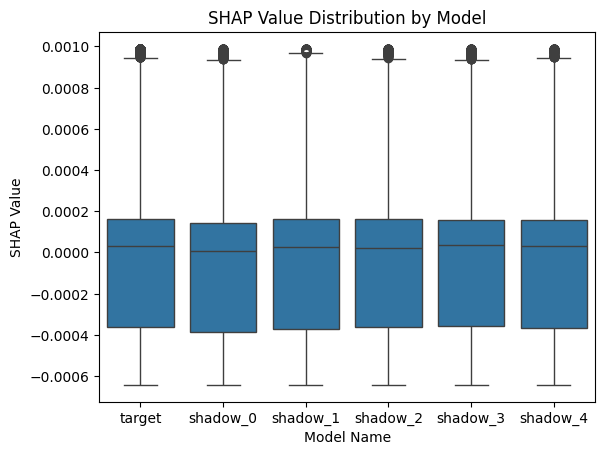

In [25]:
import seaborn as sns

# Plot distribution of SHAP values for each model
sns.boxplot(x='model_name', y='shap_value', data=test_set_df)
plt.title('SHAP Value Distribution by Model')
plt.ylabel('SHAP Value')
plt.xlabel('Model Name')
plt.show()


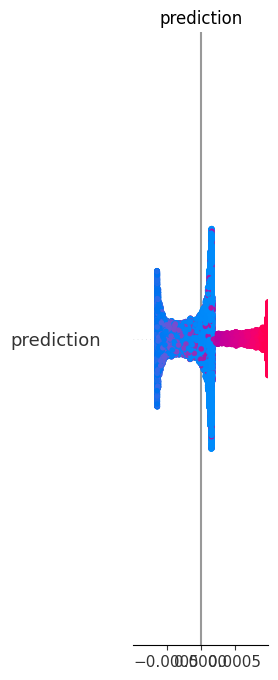

In [26]:
shap.summary_plot(shap_values, xts_att_combined, feature_names=test_set_df.columns)


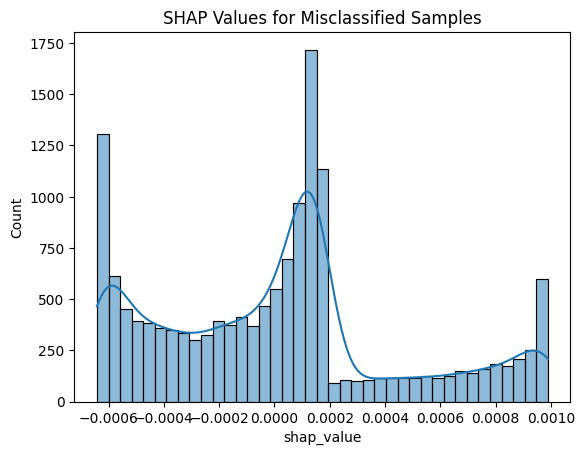

In [27]:

test_set_df['misclassified'] = (test_set_df['attack_prediction'].round() != test_set_df['is_member'])

# Analyze SHAP values for misclassified samples
misclassified_samples = test_set_df[test_set_df['misclassified']]
sns.histplot(misclassified_samples['shap_value'], kde=True)
plt.title('SHAP Values for Misclassified Samples')
plt.show()


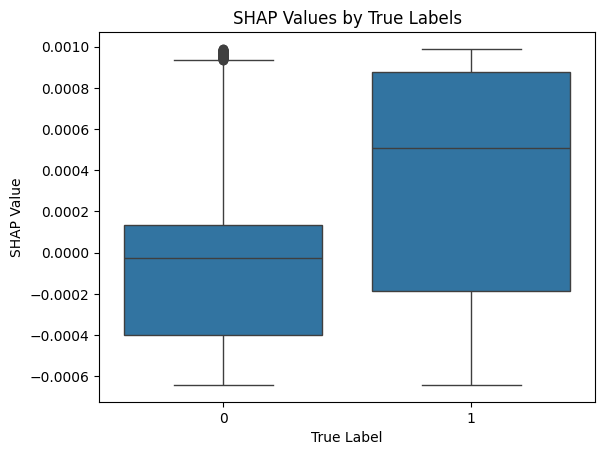

In [28]:
sns.boxplot(x='true_label', y='shap_value', data=test_set_df)
plt.title('SHAP Values by True Labels')
plt.ylabel('SHAP Value')
plt.xlabel('True Label')
plt.show()


Average SHAP Value by Model:
model_name
shadow_0   -0.000007
shadow_1    0.000008
shadow_2   -0.000003
shadow_3    0.000007
shadow_4   -0.000009
target      0.000007
Name: shap_value, dtype: float64


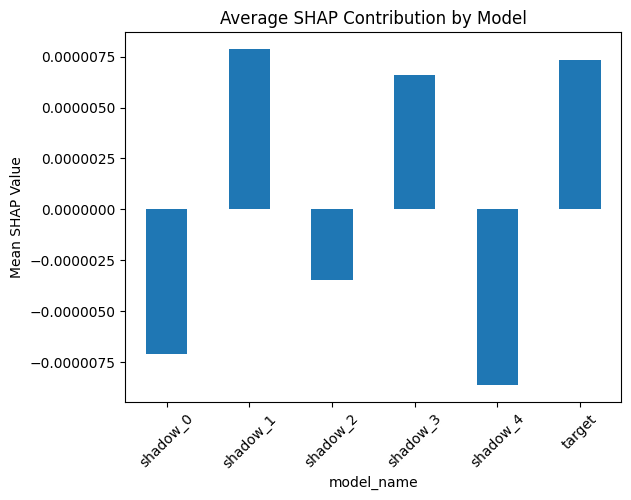

In [29]:
## Quantifica a contribuição média do SHAP de cada modelo

model_contributions = test_set_df.groupby('model_name')['shap_value'].mean()
print("Average SHAP Value by Model:")
print(model_contributions)

model_contributions.plot(
    kind='bar', 
    title='Average SHAP Contribution by Model',
    ylabel='Mean SHAP Value',
    legend=False
)


plt.ticklabel_format(style='plain', axis='y')  
plt.xticks(rotation=45)  
plt.show()

In [30]:
test_set_df.head(3000)

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value,misclassified
0,0.491944,0,1,target,0,train,0.501273,0.000194,True
1,0.622688,0,0,target,1,train,0.501625,0.000546,True
2,0.572306,0,0,target,2,train,0.501500,0.000420,True
3,0.057809,0,0,target,3,train,0.500715,-0.000364,True
4,0.637416,0,1,target,4,train,0.501659,0.000580,True
...,...,...,...,...,...,...,...,...,...
2995,0.146033,0,1,target,2995,train,0.500442,-0.000638,True
2996,0.001547,0,0,target,2996,train,0.501236,0.000157,True
2997,0.111856,0,0,target,2997,train,0.500490,-0.000589,True
2998,0.091203,0,0,target,2998,train,0.500552,-0.000528,True


In [31]:
# Filter for target model predictions
target_model_data = test_set_df[test_set_df['model_name'] == 'target']
target_model_data

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value,misclassified
0,0.491944,0,1,target,0,train,0.501273,0.000194,True
1,0.622688,0,0,target,1,train,0.501625,0.000546,True
2,0.572306,0,0,target,2,train,0.501500,0.000420,True
3,0.057809,0,0,target,3,train,0.500715,-0.000364,True
4,0.637416,0,1,target,4,train,0.501659,0.000580,True
...,...,...,...,...,...,...,...,...,...
19995,0.001576,1,0,target,9995,test,0.501236,0.000157,False
19996,0.003911,1,0,target,9996,test,0.501207,0.000127,False
19997,0.027011,1,0,target,9997,test,0.500955,-0.000124,False
19998,0.056686,1,0,target,9998,test,0.500722,-0.000357,False


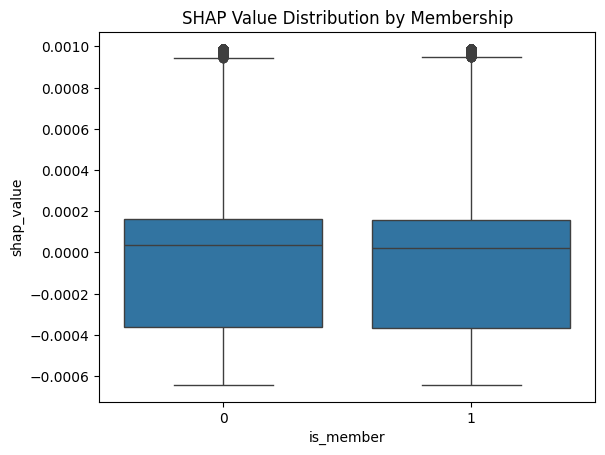

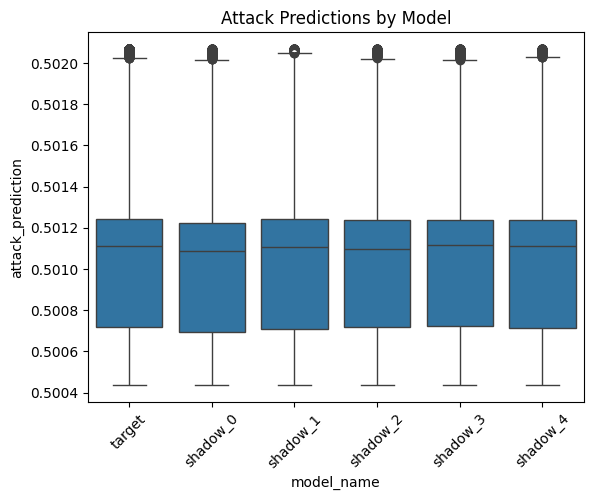

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=test_set_df, x='is_member', y='shap_value')
plt.title('SHAP Value Distribution by Membership')
plt.show()

# Attack predictions by model
sns.boxplot(data=test_set_df, x='model_name', y='attack_prediction')
plt.title('Attack Predictions by Model')
plt.xticks(rotation=45)
plt.show()


In [33]:
positive_shap = test_set_df[test_set_df['shap_value'] > 0]
positive_shap

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value,misclassified
0,0.491944,0,1,target,0,train,0.501273,0.000194,True
1,0.622688,0,0,target,1,train,0.501625,0.000546,True
2,0.572306,0,0,target,2,train,0.501500,0.000420,True
4,0.637416,0,1,target,4,train,0.501659,0.000580,True
9,0.614619,0,1,target,9,train,0.501606,0.000527,True
...,...,...,...,...,...,...,...,...,...
29991,0.658139,1,0,shadow_4,8537,test,0.501705,0.000626,False
29993,0.836494,1,1,shadow_4,6841,test,0.501988,0.000908,False
29994,0.650128,1,1,shadow_4,1714,test,0.501688,0.000608,False
29998,0.000250,1,0,shadow_4,3481,test,0.501253,0.000174,False


In [34]:
positive_shap_sorted = positive_shap.sort_values(by='shap_value', ascending=False)
positive_shap_sorted.head()

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value,misclassified
5753,0.993496,0,1,target,5753,train,0.502068,0.000989,True
2369,0.993496,0,1,target,2369,train,0.502068,0.000989,True
74,0.993496,0,1,target,74,train,0.502068,0.000989,True
18898,0.993496,1,1,target,8898,test,0.502068,0.000989,False
13337,0.993496,1,1,target,3337,test,0.502068,0.000989,False


## Explicações conjunto de Treino

In [35]:
shap_values_train = explainer.shap_values(xtr_att)

/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_24
Received: inputs=['Tensor(shape=(100000, 1))']
  warnings.warn(msg)


In [36]:
train_set_df = pd.DataFrame({
    'prediction': model_attack.predict(xtr_att).flatten(),
    'true_label': ytr_att.flatten(),
    'shap_value': shap_values_train[:, 0, 0] 
})

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 242us/step


In [37]:
train_set_df

,prediction,true_label,shap_value
0,0.501815,0.0,0.000735
1,0.500755,0.0,-0.000325
2,0.501237,0.0,0.000158
3,0.501606,0.0,0.000527
4,0.501880,0.0,0.000801
...,...,...,...
99995,0.501168,1.0,0.000089
99996,0.500743,1.0,-0.000336
99997,0.501790,1.0,0.000711
99998,0.501802,1.0,0.000723


In [38]:
positive_shap_train = train_set_df[train_set_df['shap_value'] > 0]
positive_shap_train

,prediction,true_label,shap_value
0,0.501815,0.0,0.000735
2,0.501237,0.0,0.000158
3,0.501606,0.0,0.000527
4,0.501880,0.0,0.000801
7,0.502067,0.0,0.000987
...,...,...,...
99993,0.502068,1.0,0.000988
99995,0.501168,1.0,0.000089
99997,0.501790,1.0,0.000711
99998,0.501802,1.0,0.000723


In [39]:
model_ids =  np.repeat(['model_shadow_1', 'model_shadow_2', 'model_shadow_3', 'model_shadow_4', 'model_shadow_5'], 20000)

train_set_df['name_model'] = model_ids
train_set_df

,prediction,true_label,shap_value,name_model
0,0.501815,0.0,0.000735,model_shadow_1
1,0.500755,0.0,-0.000325,model_shadow_1
2,0.501237,0.0,0.000158,model_shadow_1
3,0.501606,0.0,0.000527,model_shadow_1
4,0.501880,0.0,0.000801,model_shadow_1
...,...,...,...,...
99995,0.501168,1.0,0.000089,model_shadow_5
99996,0.500743,1.0,-0.000336,model_shadow_5
99997,0.501790,1.0,0.000711,model_shadow_5
99998,0.501802,1.0,0.000723,model_shadow_5


Average SHAP Value by Model:
name_model
model_shadow_1   -0.000009
model_shadow_2    0.000009
model_shadow_3   -0.000002
model_shadow_4    0.000014
model_shadow_5   -0.000012
Name: shap_value, dtype: float64


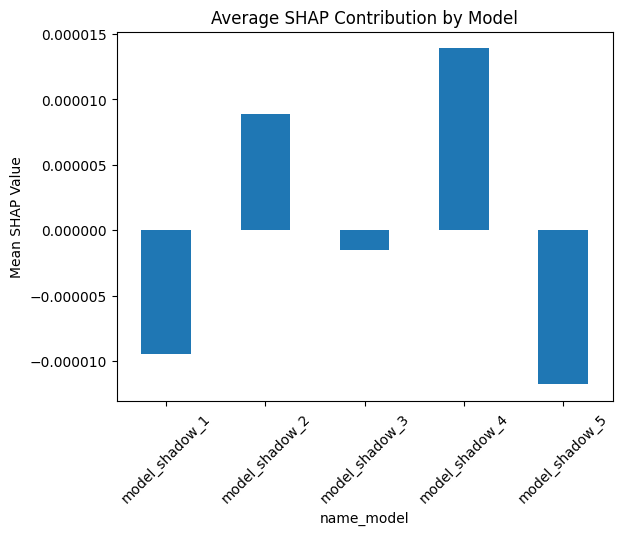

In [40]:
## Quantifica a contribuição média do SHAP de cada modelo

model_contributions = train_set_df.groupby('name_model')['shap_value'].mean()
print("Average SHAP Value by Model:")
print(model_contributions)


model_contributions.plot(
    kind='bar', 
    title='Average SHAP Contribution by Model',
    ylabel='Mean SHAP Value',
    legend=False
)

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

In [41]:
xtr_att_shap = positive_shap_train['prediction'].values.reshape(-1, 1)
ytr_att_shap = positive_shap_train['true_label'].values.reshape(-1, 1)

In [ ]:
model_attack_shap = Sequential()
model_attack_shap.add(Dense(5, input_shape = (xtr_att_shap.shape[1],), activation='sigmoid', name = 'hiden'))
model_attack_shap.add(Dense(1,  activation = 'sigmoid', name = 'output'))
opt = keras.optimizers.Adam(learning_rate=0.001, decay = 1e-7)

model_attack_shap.compile(loss='binary_crossentropy', optimizer= opt, metrics= ['accuracy' ])

hist_attack_shap = model_attack_shap.fit(xtr_att_shap, ytr_att_shap, batch_size=32, 
                                        epochs=100,
                                        shuffle=True,
                                        verbose=1)
                      

In [43]:
y_score_shap = model_attack_shap.predict(xts_att_combined)
average_precision_shap = average_precision_score(yts_att_combined, y_score_shap)

print('Average precision-recall score (SHAP-based training): {0:0.2f}'.format(average_precision_shap))


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step
Average precision-recall score (SHAP-based training): 0.50


In [44]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(random_state=42)

In [45]:
ran_for.fit(xtr_att_shap, ytr_att_shap)

/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [46]:
Y_pred_ran_for = ran_for.predict(xts_att_combined)

In [48]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(yts_att_combined, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(yts_att_combined, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 49.88
F1 score: 28.47
